In [1]:
import yfinance as yf
import pandas as pd
import numpy as np

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [4]:
from datetime import datetime

# For time stamps
yf.pdr_override()

# Define the top 7 S&P 500 companies
top_7_list = ['GOOG', 'NVDA', 'AMZN', 'META', 'TSLA', 'AAPL', 'MSFT']

# Set the date range
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

# Download the data and concatenate into a single DataFrame
top_7_dfs = [yf.download(stock, start, end).assign(Company=stock) for stock in top_7_list]
top_7_df = pd.concat(top_7_dfs)

top_7_df.tail()

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,Company
Date,,,,,,,
2024-03-07,406.119995,409.779999,402.239990,409.140015,409.140015,18718500,MSFT
2024-03-08,407.959991,410.420013,404.329987,406.220001,406.220001,17971700,MSFT
2024-03-11,403.760010,405.679993,401.260010,404.519989,404.519989,16120800,MSFT
2024-03-12,407.619995,415.570007,406.790009,415.279999,415.279999,22457000,MSFT
2024-03-13,418.100006,418.089996,411.470001,415.100006,415.100006,16980891,MSFT


In [5]:
spy_df = yf.download('SPY', start, end)
spy_df['ETF'] = 'SPY'  # Optional: add a column to explicitly label this as SPY data

spy_df.tail()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,ETF
Date,,,,,,,
2024-03-07,513.140015,515.890015,509.809998,514.809998,514.809998,58652100,SPY
2024-03-08,515.460022,518.219971,511.130005,511.720001,511.720001,86425500,SPY
2024-03-11,510.480011,511.880005,508.500000,511.279999,511.279999,62557200,SPY
2024-03-12,513.450012,517.380005,510.859985,516.780029,516.780029,73114400,SPY
2024-03-13,517.109985,517.289978,514.489990,515.969971,515.969971,48589420,SPY


In [6]:
# Define the bottom 20 S&P 500 companies
bottom_20_list = ['ETSY', 'FMC', 'FRT', 'GNRC', 'HAS', 'IVZ', 'MHK', 'MKTX', 'NCLH', 'PARA',
                  'PNW', 'RHI', 'VFC', 'WHR', 'XRAY', 'ZION']

# Download the data and concatenate into a single DataFrame
bottom_20_dfs = [yf.download(stock, start, end).assign(Company=stock) for stock in bottom_20_list]
bottom_20_df = pd.concat(bottom_20_dfs)

bottom_20_df.tail()


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

,Open,High,Low,Close,Adj Close,Volume,Company
Date,,,,,,,
2024-03-07,41.889999,42.599998,41.150002,41.520000,41.520000,2512100,ZION
2024-03-08,42.230000,42.950001,42.060001,42.240002,42.240002,2459500,ZION
2024-03-11,42.270000,42.439999,41.240002,41.610001,41.610001,2607800,ZION
2024-03-12,41.630001,42.040001,40.669998,40.900002,40.900002,2254900,ZION
2024-03-13,40.650002,41.369999,40.650002,41.070000,41.070000,1888642,ZION


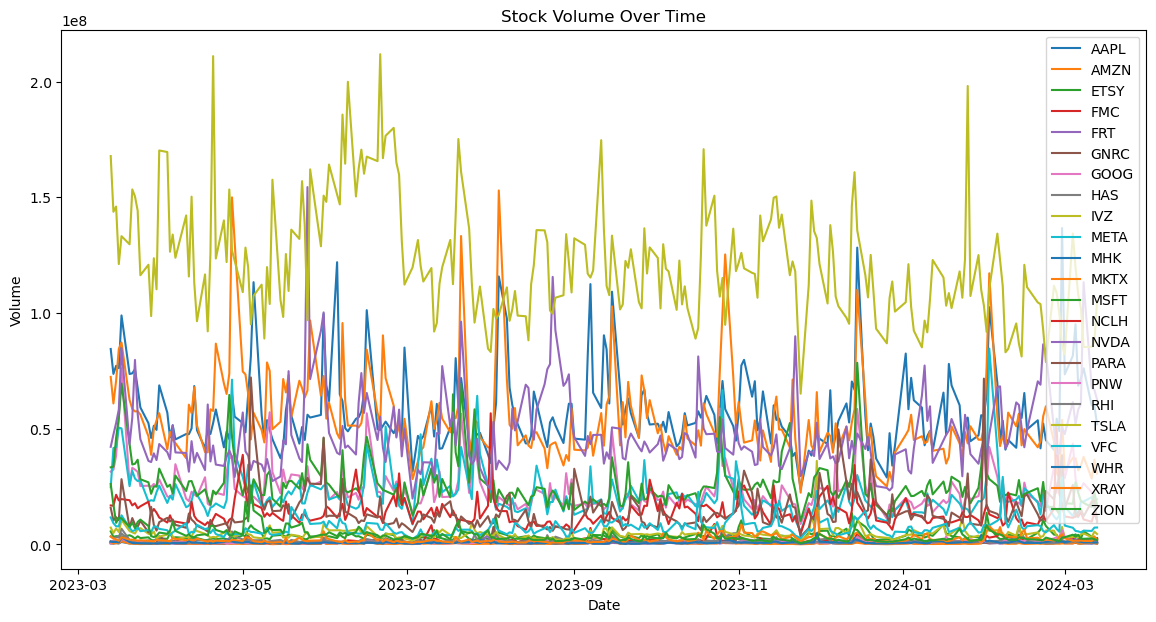

In [7]:
import matplotlib.pyplot as plt

# Assuming top_7_df, bottom_20_df, and spy_df have been created and contain the 'Volume' and 'Date' columns

# Combine all DataFrames for plotting
combined_df = pd.concat([top_7_df, bottom_20_df, spy_df])

# Convert the index to a 'Date' column if it's not already a column
if isinstance(combined_df.index, pd.DatetimeIndex):
    combined_df.reset_index(inplace=True)
    combined_df.rename(columns={'index': 'Date'}, inplace=True)

# Plotting
plt.figure(figsize=(14, 7))
for label, df in combined_df.groupby('Company'):
    plt.plot(df['Date'], df['Volume'], label=label)

plt.title('Stock Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.show()


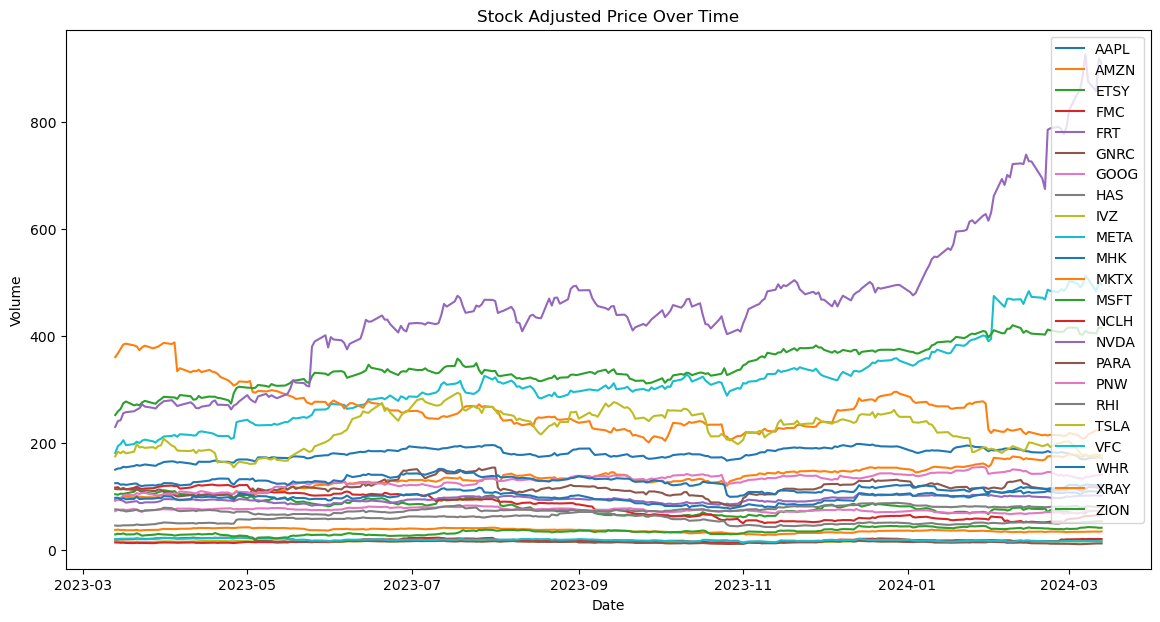

In [9]:
if isinstance(combined_df.index, pd.DatetimeIndex):
    combined_df.reset_index(inplace=True)
    combined_df.rename(columns={'index': 'Date'}, inplace=True)

# Plotting
plt.figure(figsize=(14, 7))
for label, df in combined_df.groupby('Company'):
    plt.plot(df['Date'], df['Adj Close'], label=label)

plt.title('Stock Adjusted Price Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.show()

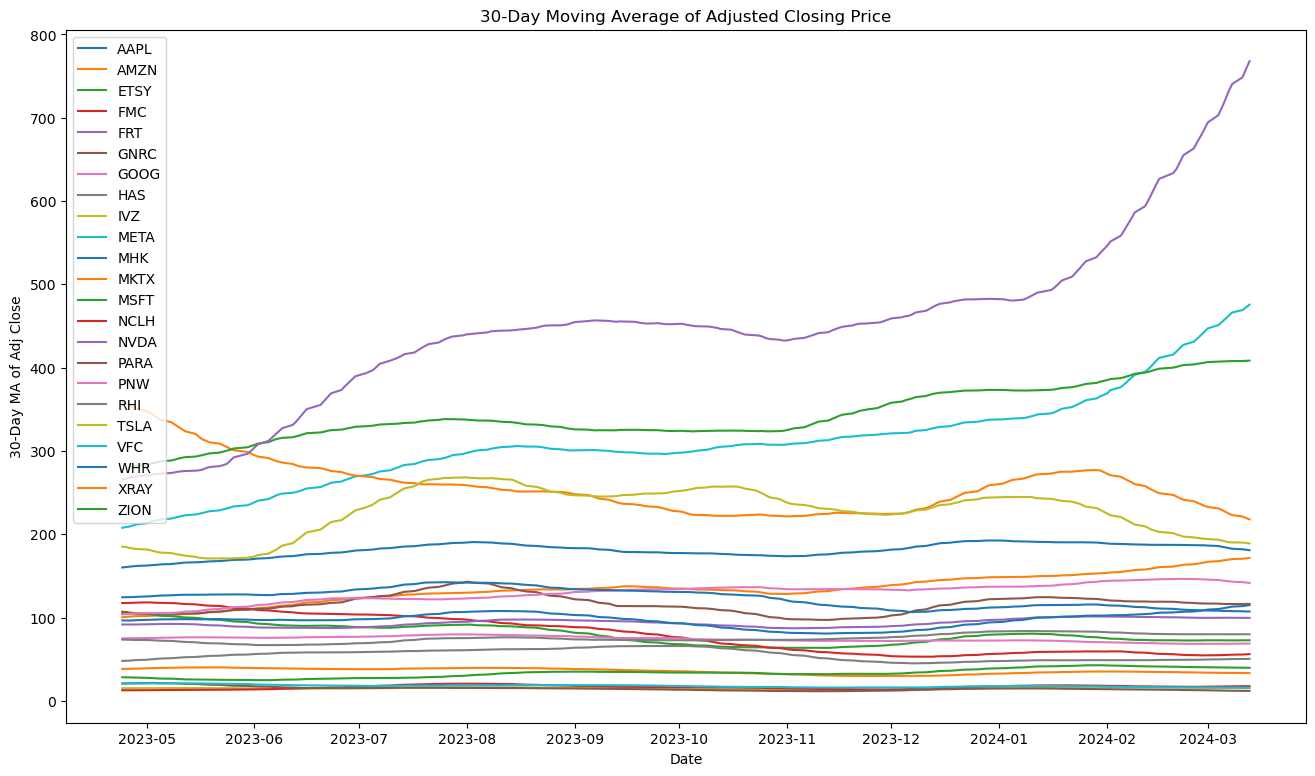

In [15]:
ma = 30  # Moving average period

# Calculate the 30-day moving average for each company's 'Adj Close'
combined_df[f'MA for {ma} days'] = combined_df.groupby('Company')['Adj Close'].transform(lambda x: x.rolling(window=ma).mean())

# Ensure 'Date' is a column for plotting
if not 'Date' in combined_df.columns:
    combined_df.reset_index(inplace=True)

# Plotting
plt.figure(figsize=(16, 9))

for label, df in combined_df.groupby('Company'):
    plt.plot(df['Date'], df[f'MA for {ma} days'], label=label)

plt.title(f'{ma}-Day Moving Average of Adjusted Closing Price')
plt.xlabel('Date')
plt.ylabel(f'{ma}-Day MA of Adj Close')
plt.legend()
plt.show()

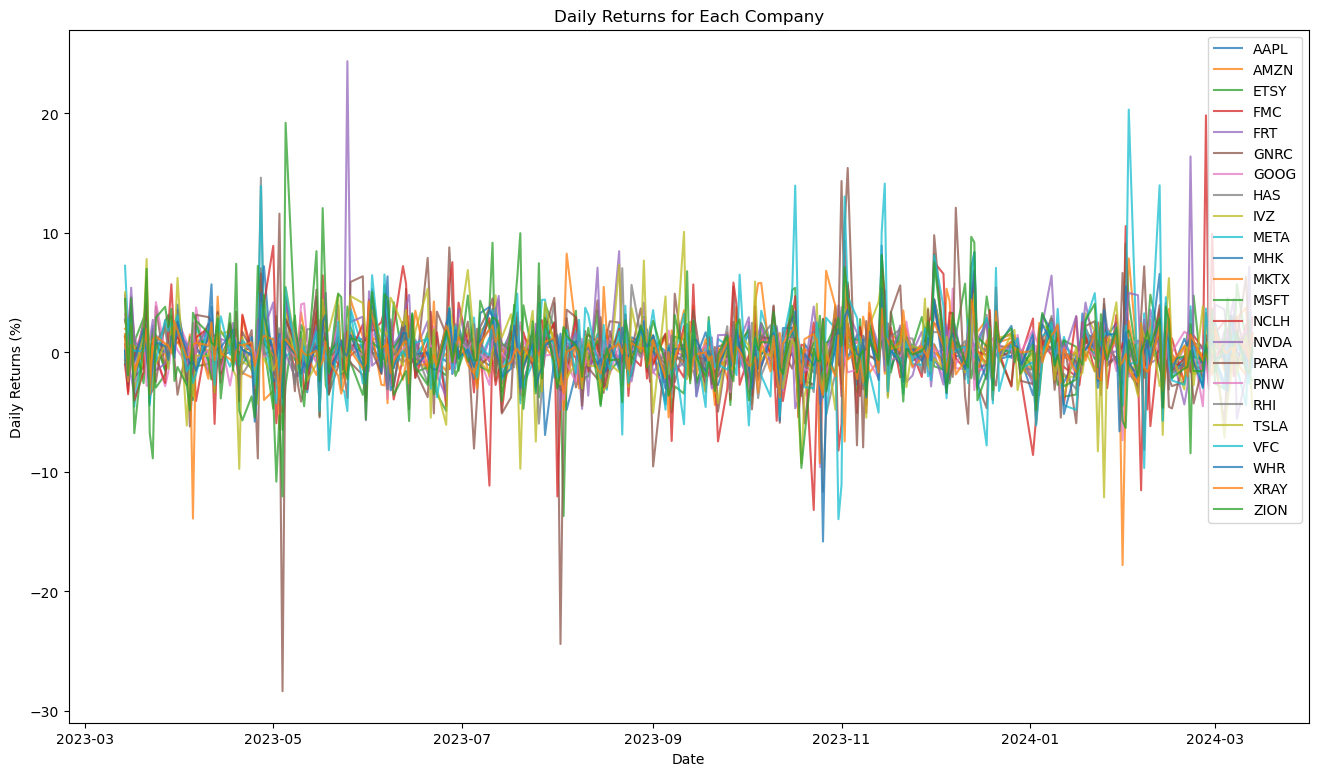

In [16]:

# Calculate daily returns for each company
combined_df['Returns'] = combined_df.groupby('Company')['Adj Close'].pct_change() * 100  # Convert to percentage

# Ensure 'Date' is a column for plotting
if 'Date' not in combined_df.columns:
    combined_df.reset_index(inplace=True)

# Plotting
plt.figure(figsize=(16, 9))

for label, df in combined_df.groupby('Company'):
    plt.plot(df['Date'], df['Returns'], label=label, alpha=0.75)

plt.title('Daily Returns for Each Company')
plt.xlabel('Date')
plt.ylabel('Daily Returns (%)')
plt.legend()
plt.show()


In [18]:
def sliding_window(data_mag7, data_spy, data_bottom20, start_date, end_date, train_days, test_days):
    """
    Generate sliding window splits of the data for training and testing.

    :param data_mag7: DataFrame with Mag_7 data (returns, volume)
    :param data_spy: DataFrame with SPY data (returns, volume)
    :param data_bottom20: DataFrame with Bottom 20 companies' returns
    :param start_date: Start date for the analysis
    :param end_date: End date for the analysis
    :param train_days: Number of days for training period
    :param test_days: Number of days for testing period
    
    :return: Yields tuples of (train_mag7, train_spy, test_bottom20) for each sliding window
    """
    # Filter data by start and end dates
    mask_mag7 = (data_mag7['Date'] >= start_date) & (data_mag7['Date'] <= end_date)
    mask_spy = (data_spy['Date'] >= start_date) & (data_spy['Date'] <= end_date)
    mask_bottom20 = (data_bottom20['Date'] >= start_date) & (data_bottom20['Date'] <= end_date)

    data_mag7_filtered = data_mag7.loc[mask_mag7]
    data_spy_filtered = data_spy.loc[mask_spy]
    data_bottom20_filtered = data_bottom20.loc[mask_bottom20]

    total_days = (end_date - start_date).days + 1
    for start_offset in range(0, total_days - train_days - test_days + 1):
        train_end = start_date + pd.Timedelta(days=start_offset + train_days - 1)
        test_start = train_end + pd.Timedelta(days=1)
        test_end = test_start + pd.Timedelta(days=test_days - 1)

        train_mag7 = data_mag7_filtered[(data_mag7_filtered['Date'] >= start_date + pd.Timedelta(days=start_offset)) & (data_mag7_filtered['Date'] <= train_end)]
        train_spy = data_spy_filtered[(data_spy_filtered['Date'] >= start_date + pd.Timedelta(days=start_offset)) & (data_spy_filtered['Date'] <= train_end)]
        test_bottom20 = data_bottom20_filtered[(data_bottom20_filtered['Date'] >= test_start) & (data_bottom20_filtered['Date'] <= test_end)]

        yield (train_mag7, train_spy, test_bottom20)

In [23]:
top_7_df

,Open,High,Low,Close,Adj Close,Volume,Company,30_MA,Returns
Date,,,,,,,,,
2023-03-13,90.565002,93.080002,89.940002,91.660004,91.660004,31508600,GOOG,NaN,NaN
2023-03-14,93.070000,94.830002,92.779999,94.250000,94.250000,32303900,GOOG,NaN,2.825656
2023-03-15,93.540001,97.250000,93.040001,96.550003,96.550003,38367300,GOOG,NaN,2.440322
2023-03-16,96.570000,101.970001,95.870003,101.070000,101.070000,54499500,GOOG,NaN,4.681509
2023-03-17,100.839996,103.489998,100.750000,102.459999,102.459999,76140300,GOOG,NaN,1.375284
...,...,...,...,...,...,...,...,...,...
2024-03-07,406.119995,409.779999,402.239990,409.140015,409.140015,18718500,MSFT,408.295665,1.753343
2024-03-08,407.959991,410.420013,404.329987,406.220001,406.220001,17971700,MSFT,408.340666,-0.713695
2024-03-11,403.760010,405.679993,401.260010,404.519989,404.519989,16120800,MSFT,408.360332,-0.418495


In [24]:
spy_df

,Open,High,Low,Close,Adj Close,Volume,ETF,30_MA,Returns
Date,,,,,,,,,
2023-03-13,381.809998,390.390015,380.649994,385.359985,379.590698,157790000,SPY,NaN,NaN
2023-03-14,390.500000,393.450012,387.049988,391.730011,385.865387,149752400,SPY,NaN,1.653014
2023-03-15,385.890015,389.489990,383.709991,389.279999,383.452057,172996900,SPY,NaN,-0.625433
2023-03-16,386.820007,396.470001,386.290009,396.109985,390.179749,143254200,SPY,NaN,1.754507
2023-03-17,393.220001,394.399994,388.549988,389.989990,385.617523,140553400,SPY,NaN,-1.169262
...,...,...,...,...,...,...,...,...,...
2024-03-07,513.140015,515.890015,509.809998,514.809998,514.809998,58652100,SPY,499.893334,0.992643
2024-03-08,515.460022,518.219971,511.130005,511.720001,511.720001,86425500,SPY,500.683001,-0.600221
2024-03-11,510.480011,511.880005,508.500000,511.279999,511.279999,62557200,SPY,501.478667,-0.085985


In [25]:
bottom_20_df

,Open,High,Low,Close,Adj Close,Volume,Company,30_MA,Returns
Date,,,,,,,,,
2023-03-13,103.014999,106.370003,99.239998,103.709999,103.709999,5646000,ETSY,NaN,NaN
2023-03-14,106.754997,107.000000,101.150002,102.790001,102.790001,3300700,ETSY,NaN,-0.008871
2023-03-15,101.730003,105.199997,100.160004,104.739998,104.739998,3586700,ETSY,NaN,0.018971
2023-03-16,102.820000,105.209999,101.110001,104.430000,104.430000,3549000,ETSY,NaN,-0.002960
2023-03-17,104.040001,105.839996,103.389999,105.339996,105.339996,3175800,ETSY,NaN,0.008714
...,...,...,...,...,...,...,...,...,...
2024-03-07,41.889999,42.599998,41.150002,41.520000,41.520000,2512100,ZION,40.442333,0.005327
2024-03-08,42.230000,42.950001,42.060001,42.240002,42.240002,2459500,ZION,40.374000,0.017341
2024-03-11,42.270000,42.439999,41.240002,41.610001,41.610001,2607800,ZION,40.293667,-0.014915


In [27]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

# Placeholder for data loading and return calculation
# data_mag7, data_spy, data_bottom20 = load_your_data()  # You'll need to implement data loading

# Calculate daily returns for each DataFrame
for df in [top_7_df, bottom_20_df]:
    for company in df['Company'].unique():
        company_data = df[df['Company'] == company]
        company_data['Returns'] = company_data['Adj Close'].pct_change() * 100



/var/folders/kw/st1ymrwj7q923cvxxbj099fh0000gn/T/ipykernel_93244/4258314528.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  company_data['Returns'] = company_data['Adj Close'].pct_change() * 100


In [28]:
top_7_grouped = top_7_df.groupby('Company')

# Create a dictionary to store each company's DataFrame
top_7_dict = {company: data.copy() for company, data in top_7_grouped}

In [29]:
bottom_20_df_grouped = bottom_20_df.groupby('Company')

# Create a dictionary to store each company's DataFrame
bottom_20_df_grouped_dict = {company: data.copy() for company, data in bottom_20_df_grouped}

In [30]:
spy_df['Returns'] = spy_df['Adj Close'].pct_change() * 100

In [32]:
for bottom_company, bottom_df in bottom_20_df_grouped_dict.items():
    # Ensure 'Date' is a column
    if 'Date' not in bottom_df.columns:
        bottom_df.reset_index(inplace=True)
    
    # For each top 7 company, add their volume and returns to the bottom company's DataFrame
    for top_company, top_df in top_7_dict.items():
        # Ensure 'Date' is a column
        if 'Date' not in top_df.columns:
            top_df.reset_index(inplace=True)
        # Merge while ensuring no column name conflicts
        bottom_df = bottom_df.merge(top_df[['Date', 'Volume', 'Returns']], on='Date', how='left', suffixes=('', f'_{top_company}'))
    
    # Add SPY data as well
    if 'Date' not in spy_df.columns:
        spy_df.reset_index(inplace=True)
    bottom_df = bottom_df.merge(spy_df[['Date', 'Volume', 'Returns']], on='Date', how='left', suffixes=('', '_SPY'))
    
    # Assign the updated DataFrame back to the dictionary
    bottom_20_df_grouped_dict[bottom_company] = bottom_df

# Show the updated DataFrame for one of the bottom 20 companies
print(bottom_20_df_grouped_dict['ETSY'].head())

        Date        Open        High         Low       Close   Adj Close  \
0 2023-03-13  103.014999  106.370003   99.239998  103.709999  103.709999   
1 2023-03-14  106.754997  107.000000  101.150002  102.790001  102.790001   
2 2023-03-15  101.730003  105.199997  100.160004  104.739998  104.739998   
3 2023-03-16  102.820000  105.209999  101.110001  104.430000  104.430000   
4 2023-03-17  104.040001  105.839996  103.389999  105.339996  105.339996   

    Volume Company  30_MA   Returns  ...  Volume_META  Returns_META  \
0  5646000    ETSY    NaN       NaN  ...     24728000      2.352397   
1  3300700    ETSY    NaN -0.008871  ...     41642600      7.252626   
2  3586700    ETSY    NaN  0.018971  ...     42123600      1.922481   
3  3549000    ETSY    NaN -0.002960  ...     50447100      3.630841   
4  3175800    ETSY    NaN  0.008714  ...     50141100     -4.547886   

   Volume_MSFT  Returns_MSFT  Volume_NVDA  Returns_NVDA  Volume_TSLA  \
0     33339700     47.170548     42189000   

In [58]:
import pandas as pd

def splice_data(df, start_date, end_date, train_time, test_time):
    """
    Splits the data into training and test sets for a given date range.
    Adjusted to account for whether 'Date' is a column or already set as the index.
    """
    # Convert 'Date' to datetime and set as index if it's not already
    if not df.index.name == 'Date':
        if 'Date' in df.columns:
            df['Date'] = pd.to_datetime(df['Date'])
            df.set_index('Date', inplace=True)
        else:
            print("DataFrame does not contain a 'Date' column.")
            return None

    df = df[(df.index >= pd.to_datetime(start_date)) & (df.index <= pd.to_datetime(end_date))]
    split_date = df.index.min() + pd.Timedelta(days=train_time)
    
    train_df = df[df.index < split_date]
    test_df = df[(df.index >= split_date) & (df.index < split_date + pd.Timedelta(days=test_time))]
    
    # Assuming Mag_7 and SPY data are already included in df
    # Adjust column selection as needed based on your DataFrame structure
    train_mag_7 = train_df.filter(regex='.*(_AAPL|_GOOG|_MSFT|_AMZN|_META|_TSLA|_NVDA)')
    train_spy = train_df.filter(regex='_SPY$')
    test_mag_7 = test_df.filter(regex='.*(_top7|_AAPL|_GOOG|_MSFT|_AMZN|_META|_TSLA|_NVDA)')
    test_spy = test_df.filter(regex='_SPY$')
    test_set = test_df[['Returns']]  # Ensure 'Returns' exists and is meaningful for your analysis
    
    y_train = train_df['Returns']  # Assuming this is how you want to set up your target
    
    return train_mag_7, train_spy, test_mag_7, test_spy, test_set, y_train





# Example usage of the splice function
# Ensure that 'Date' column is in datetime format in the DataFrame
# df['Date'] = pd.to_datetime(df['Date'])


In [59]:
etsy_df = bottom_20_df_grouped_dict['ETSY']
# Assuming the splice_data function is already defined as per previous explanation
train_mag_7, train_spy,test_mag_7, test_spy, test_set, y_train = splice_data(etsy_df, '2023-10-01', '2024-03-12', 75, 15)


In [62]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from math import sqrt

# Initialize Linear Regression models
model_mag_7 = LinearRegression()
model_spy = LinearRegression()

# Train the models
# Note: Ensure that y_train is correctly prepared from the splice_data function
model_mag_7.fit(train_mag_7, y_train)
model_spy.fit(train_spy, y_train)

# Make predictions
y_pred_mag_7 = model_mag_7.predict(test_mag_7)
y_pred_spy = model_spy.predict(test_spy)

# Calculate RMSE
rmse_mag_7 = sqrt(mean_squared_error(test_set['Returns'], y_pred_mag_7))
rmse_spy = sqrt(mean_squared_error(test_set['Returns'], y_pred_spy))

print(f"RMSE for Mag_7 model: {rmse_mag_7}")
print(f"RMSE for SPY model: {rmse_spy}")


RMSE for Mag_7 model: 0.026145174803416247
RMSE for SPY model: 0.019880186858393045
